In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
col_names = ['timeStamp', 'Gender', 'Grade', 'Age', 'Length', 'Weight', 'ShoesSize']
dataframe = pd.read_csv("../human_features.csv", names = col_names, skiprows=(0, ))

In [3]:
dataFrameWithConcernedFeatures = dataframe.loc[:, ['Age', 'Length', 'Gender']]

In [4]:
training_data = dataFrameWithConcernedFeatures.copy()

In [6]:
label_encoder = LabelEncoder()
training_data['Gender'] = label_encoder.fit_transform(training_data['Gender'])

In [7]:
training_data

,Age,Length,Gender
0,23.0,178,1
1,21.0,155,0
2,21.0,165,1
3,22.0,173,1
4,23.0,170,1
...,...,...,...
72,23.0,165,1
73,25.0,186,1
74,22.0,173,1
75,22.0,180,1


In [8]:
training_data = training_data.loc[training_data['Age'] <= 40]

In [9]:
scaler = MinMaxScaler()
scaler.fit(training_data)
scaled = scaler.fit_transform(training_data)
scaled_df = pd.DataFrame(scaled, columns=training_data.columns)

In [10]:
X = scaled_df.loc[:, scaled_df.columns != 'Gender']
Y = scaled_df.loc[:, 'Gender']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [12]:
clf = SVC(kernel='linear', C=1000)
clf.fit(x_train.values, y_train.values)

SVC(C=1000, kernel='linear')

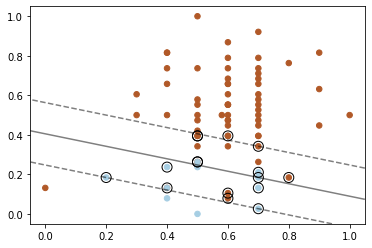

In [24]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [54]:
y_predict = clf.predict(x_test.values)

In [55]:
round((accuracy_score(y_test, y_predict) * 100), ndigits=2)

88.46

In [56]:
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

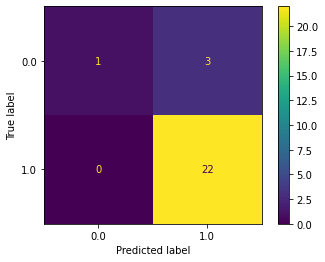

In [58]:
disp.plot()